In [1]:
import os
os.chdir('/home/jovyan/221-final-project/Group Assignments/Income')

In [2]:
!pip install RISE

  Using cached rise-5.7.1-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached rise-5.7.1-py2.py3-none-any.whl (4.3 MB)


### Importing income data for LA County

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [5]:
df = pd.read_csv('/home/jovyan/221-final-project/Group Assignments/Income/data/findata/ACSST5Y2023.S2503-Data.csv', low_memory=False)

In [6]:
df.shape

(2499, 555)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df.sample(5)

,GEO_ID,NAME,S2503_C01_001E,S2503_C01_001M,S2503_C01_002E,S2503_C01_002M,S2503_C01_003E,S2503_C01_003M,S2503_C01_004E,S2503_C01_004M,S2503_C01_005E,S2503_C01_005M,S2503_C01_006E,S2503_C01_006M,S2503_C01_007E,S2503_C01_007M,S2503_C01_008E,S2503_C01_008M,S2503_C01_009E,S2503_C01_009M,S2503_C01_010E,S2503_C01_010M,S2503_C01_011E,S2503_C01_011M,S2503_C01_012E,S2503_C01_012M,S2503_C01_013E,S2503_C01_013M,S2503_C01_014E,S2503_C01_014M,S2503_C01_015E,S2503_C01_015M,S2503_C01_016E,S2503_C01_016M,S2503_C01_017E,S2503_C01_017M,S2503_C01_018E,S2503_C01_018M,S2503_C01_019E,S2503_C01_019M,S2503_C01_020E,S2503_C01_020M,S2503_C01_021E,S2503_C01_021M,S2503_C01_022E,S2503_C01_022M,S2503_C01_023E,S2503_C01_023M,S2503_C01_024E,S2503_C01_024M,S2503_C01_025E,S2503_C01_025M,S2503_C01_026E,S2503_C01_026M,S2503_C01_027E,S2503_C01_027M,S2503_C01_028E,S2503_C01_028M,S2503_C01_029E,S2503_C01_029M,S2503_C01_030E,S2503_C01_030M,S2503_C01_031E,S2503_C01_031M,S2503_C01_032E,S2503_C01_032M,S2503_C01_033E,S2503_C01_033M,S2503_C01_034E,S2503_C01_034M,S2503_C01_035E,S2503_C01_035M,S2503_C01_036E,S2503_C01_036M,S2503_C01_037E,S2503_C01_037M,S2503_C01_038E,S2503_C01_038M,S2503_C01_039E,S2503_C01_039M,S2503_C01_040E,S2503_C01_040M,S2503_C01_041E,S2503_C01_041M,S2503_C01_042E,S2503_C01_042M,S2503_C01_043E,S2503_C01_043M,S2503_C01_044E,S2503_C01_044M,S2503_C01_045E,S2503_C01_045M,S2503_C01_046E,S2503_C01_046M,S2503_C02_001E,S2503_C02_001M,S2503_C02_002E,S2503_C02_002M,S2503_C02_003E,S2503_C02_003M,S2503_C02_004E,S2503_C02_004M,S2503_C02_005E,S2503_C02_005M,S2503_C02_006E,S2503_C02_006M,S2503_C02_007E,S2503_C02_007M,S2503_C02_008E,S2503_C02_008M,S2503_C02_009E,S2503_C02_009M,S2503_C02_010E,S2503_C02_010M,S2503_C02_011E,S2503_C02_011M,S2503_C02_012E,S2503_C02_012M,S2503_C02_013E,S2503_C02_013M,S2503_C02_014E,S2503_C02_014M,S2503_C02_015E,S2503_C02_015M,S2503_C02_016E,S2503_C02_016M,S2503_C02_017E,S2503_C02_017M,S2503_C02_018E,S2503_C02_018M,S2503_C02_019E,S2503_C02_019M,S2503_C02_020E,S2503_C02_020M,S2503_C02_021E,S2503_C02_021M,S2503_C02_022E,S2503_C02_022M,S2503_C02_023E,S2503_C02_023M,S2503_C02_024E,S2503_C02_024M,S2503_C02_025E,S2503_C02_025M,S2503_C02_026E,S2503_C02_026M,S2503_C02_027E,S2503_C02_027M,S2503_C02_028E,S2503_C02_028M,S2503_C02_029E,S2503_C02_029M,S2503_C02_030E,S2503_C02_030M,S2503_C02_031E,S2503_C02_031M,S2503_C02_032E,S2503_C02_032M,S2503_C02_033E,S2503_C02_033M,S2503_C02_034E,S2503_C02_034M,S2503_C02_035E,S2503_C02_035M,S2503_C02_036E,S2503_C02_036M,S2503_C02_037E,S2503_C02_037M,S2503_C02_038E,S2503_C02_038M,S2503_C02_039E,S2503_C02_039M,S2503_C02_040E,S2503_C02_040M,S2503_C02_041E,S2503_C02_041M,S2503_C02_042E,S2503_C02_042M,S2503_C02_043E,S2503_C02_043M,S2503_C02_044E,S2503_C02_044M,S2503_C02_045E,S2503_C02_045M,S2503_C02_046E,S2503_C02_046M,S2503_C03_001E,S2503_C03_001M,S2503_C03_002E,S2503_C03_002M,S2503_C03_003E,S2503_C03_003M,S2503_C03_004E,S2503_C03_004M,S2503_C03_005E,S2503_C03_005M,S2503_C03_006E,S2503_C03_006M,S2503_C03_007E,S2503_C03_007M,S2503_C03_008E,S2503_C03_008M,S2503_C03_009E,S2503_C03_009M,S2503_C03_010E,S2503_C03_010M,S2503_C03_011E,S2503_C03_011M,S2503_C03_012E,S2503_C03_012M,S2503_C03_013E,S2503_C03_013M,S2503_C03_014E,S2503_C03_014M,S2503_C03_015E,S2503_C03_015M,S2503_C03_016E,S2503_C03_016M,S2503_C03_017E,S2503_C03_017M,S2503_C03_018E,S2503_C03_018M,S2503_C03_019E,S2503_C03_019M,S2503_C03_020E,S2503_C03_020M,S2503_C03_021E,S2503_C03_021M,S2503_C03_022E,S2503_C03_022M,S2503_C03_023E,S2503_C03_023M,S2503_C03_024E,S2503_C03_024M,S2503_C03_025E,S2503_C03_025M,S2503_C03_026E,S2503_C03_026M,S2503_C03_027E,S2503_C03_027M,S2503_C03_028E,S2503_C03_028M,S2503_C03_029E,S2503_C03_029M,S2503_C03_030E,S2503_C03_030M,S2503_C03_031E,S2503_C03_031M,S2503_C03_032E,S2503_C03_032M,S2503_C03_033E,S2503_C03_033M,S2503_C03_034E,S2503_C03_034M,S2503_C03_035E,S2503_C03_035M,S2503_C03_036E,S2503_C03_036M,S2503_C03_037E,S2503_C03_037M,S2503_C03_038E,S2503_C03_038M,S2503_C03_039E,S2503_C03_039M,S2503_C03_040E,S2503_C03_040M,S2503_C03_041E,S2503_C03_04

In [9]:
df.GEO_ID.head()

0               Geography
1    1400000US06037101110
2    1400000US06037101122
3    1400000US06037101220
4    1400000US06037101221
Name: GEO_ID, dtype: object

### Extracting FIPS codes

In [10]:
df['FIPS'] = df['GEO_ID'].str[-11:]

In [11]:
print(df[['GEO_ID', 'FIPS']].head())

                 GEO_ID         FIPS
0             Geography    Geography
1  1400000US06037101110  06037101110
2  1400000US06037101122  06037101122
3  1400000US06037101220  06037101220
4  1400000US06037101221  06037101221


### Cleaning and reducing data

In [12]:
df.columns[df.isna().all()].tolist()

['Unnamed: 554']

In [13]:
df = df.dropna(axis=1,how="all")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Columns: 555 entries, GEO_ID to FIPS
dtypes: object(555)
memory usage: 10.6+ MB


In [15]:
columns_to_keep = ['FIPS',
                   'S2503_C01_013E',
                   'S2503_C01_024E',
                   'S2503_C02_013E',
                   'S2503_C02_024E',
                   'S2503_C03_013E',
                   'S2503_C03_024E',
                   'S2503_C04_013E',
                   'S2503_C04_024E',
                   'S2503_C05_013E',
                   'S2503_C05_024E',
                    'S2503_C06_013E',
                   'S2503_C06_024E']
df2 = df[columns_to_keep]

In [16]:
df2.columns= ['FIPS',
'MedHHIncome_All',
'MonthlyCosts_All',
'MedHHIncome_OwnerOccupied',
'MonthlyCosts_OwnerOccupied',
'MedHHIncome_RenterOccupied',
'MonthlyCosts_RenterOccupied',
'MedHHIncome_Mixed',
'MonthlyCosts_Mixed',
'MedHHIncome_NoMortgage',
'MonthlyCosts_NoMortgage',
'MedHHIncome_Mortgage',
'MonthlyCosts_Mortgage']





In [17]:
df2.sample(5)

,FIPS,MedHHIncome_All,MonthlyCosts_All,MedHHIncome_OwnerOccupied,MonthlyCosts_OwnerOccupied,MedHHIncome_RenterOccupied,MonthlyCosts_RenterOccupied,MedHHIncome_Mixed,MonthlyCosts_Mixed,MedHHIncome_NoMortgage,MonthlyCosts_NoMortgage,MedHHIncome_Mortgage,MonthlyCosts_Mortgage
1854,06037551002,104280,2111,104280,2111,85302,2071,85302,2071,113425,2154,113425,2154
1749,06037535603,62930,1627,62930,1627,94881,1855,94881,1855,43922,1582,43922,1582
1929,06037555002,87500,1990,87500,1990,122989,1911,122989,1911,67857,2025,67857,2025
942,06037265306,31757,2157,31757,2157,"250,000+","4,000+","250,000+","4,000+",30878,2151,30878,2151
1450,06037434001,82213,1772,82213,1772,84625,1193,84625,1193,54297,2080,54297,2080


In [18]:
print (df2.dtypes)

FIPS                           object
MedHHIncome_All                object
MonthlyCosts_All               object
MedHHIncome_OwnerOccupied      object
MonthlyCosts_OwnerOccupied     object
MedHHIncome_RenterOccupied     object
MonthlyCosts_RenterOccupied    object
MedHHIncome_Mixed              object
MonthlyCosts_Mixed             object
MedHHIncome_NoMortgage         object
MonthlyCosts_NoMortgage        object
MedHHIncome_Mortgage           object
MonthlyCosts_Mortgage          object
dtype: object


In [19]:
columns_to_convert = ['MedHHIncome_All',
'MonthlyCosts_All',
'MedHHIncome_OwnerOccupied',
'MonthlyCosts_OwnerOccupied',
'MedHHIncome_RenterOccupied',
'MonthlyCosts_RenterOccupied',
'MedHHIncome_Mixed',
'MonthlyCosts_Mixed',
'MedHHIncome_NoMortgage',
'MonthlyCosts_NoMortgage',
'MedHHIncome_Mortgage',
'MonthlyCosts_Mortgage']


In [20]:
# Ensure df2 is an independent copy before modifying
df2 = df2.copy()

# Convert all columns except "FIPS" to numeric
columns_to_convert = [col for col in df2.columns if col != "FIPS"]
df2.loc[:, columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors="coerce")

In [21]:
df2.dtypes

FIPS                           object
MedHHIncome_All                object
MonthlyCosts_All               object
MedHHIncome_OwnerOccupied      object
MonthlyCosts_OwnerOccupied     object
MedHHIncome_RenterOccupied     object
MonthlyCosts_RenterOccupied    object
MedHHIncome_Mixed              object
MonthlyCosts_Mixed             object
MedHHIncome_NoMortgage         object
MonthlyCosts_NoMortgage        object
MedHHIncome_Mortgage           object
MonthlyCosts_Mortgage          object
dtype: object

### Mapping Income Data

In [22]:
pip install geopandas folium matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [25]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [26]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [27]:
df2 = df2.copy()

In [28]:
# Ensure df2["FIPS"] is a string, removing any unexpected values
df2 = df2[df2["FIPS"].str.isnumeric()]  # Keep only numeric values
df2["FIPS"] = df2["FIPS"].astype(float).astype(int).astype(str).str.zfill(11)

In [29]:
# Ensure tracts["FIPS"] is also a string
tracts["FIPS"] = tracts["FIPS"].astype(str)

In [30]:
# Merge the cleaned df2 with the GeoJSON tracts dataset
tracts_income = tracts.merge(df2, on="FIPS", how="left")

In [31]:
df2.sample(5)

,FIPS,MedHHIncome_All,MonthlyCosts_All,MedHHIncome_OwnerOccupied,MonthlyCosts_OwnerOccupied,MedHHIncome_RenterOccupied,MonthlyCosts_RenterOccupied,MedHHIncome_Mixed,MonthlyCosts_Mixed,MedHHIncome_NoMortgage,MonthlyCosts_NoMortgage,MedHHIncome_Mortgage,MonthlyCosts_Mortgage
58,06037106642,139145.0,3011.0,139145.0,3011.0,138553.0,2967.0,138553.0,2967.0,156250.0,NaN,156250.0,NaN
1432,06037432902,80486.0,1487.0,80486.0,1487.0,88971.0,1080.0,88971.0,1080.0,48516.0,1737.0,48516.0,1737.0
652,06037211701,91196.0,2516.0,91196.0,2516.0,NaN,2933.0,NaN,2933.0,75000.0,2086.0,75000.0,2086.0
1313,06037406413,102278.0,2424.0,102278.0,2424.0,103221.0,2540.0,103221.0,2540.0,65560.0,1935.0,65560.0,1935.0
1521,06037480703,178200.0,2871.0,178200.0,2871.0,208929.0,3639.0,208929.0,3639.0,96901.0,2250.0,96901.0,2250.0


In [32]:
tracts.sample(5)

,CT20,geometry,FIPS
249,127805,"POLYGON ((-118.44873 34.19295, -118.44873 34.1...",06037127805
1110,300702,"POLYGON ((-118.24879 34.18531, -118.24904 34.1...",06037300702
810,231800,"POLYGON ((-118.27836 34.0038, -118.27399 34.00...",06037231800
1574,500204,"POLYGON ((-117.97001 33.97292, -117.97113 33.9...",06037500204
808,231710,"POLYGON ((-118.29001 34.00369, -118.28966 34.0...",06037231710


In [33]:
tracts_income.sample(5)

,CT20,geometry,FIPS,MedHHIncome_All,MonthlyCosts_All,MedHHIncome_OwnerOccupied,MonthlyCosts_OwnerOccupied,MedHHIncome_RenterOccupied,MonthlyCosts_RenterOccupied,MedHHIncome_Mixed,MonthlyCosts_Mixed,MedHHIncome_NoMortgage,MonthlyCosts_NoMortgage,MedHHIncome_Mortgage,MonthlyCosts_Mortgage
1458,460302,"POLYGON ((-118.15396 34.19667, -118.15475 34.1...",06037460302,92009.0,2309.0,92009.0,2309.0,103750.0,2258.0,103750.0,2258.0,76953.0,2543.0,76953.0,2543.0
383,143603,"POLYGON ((-118.36897 34.14601, -118.36932 34.1...",06037143603,92663.0,2245.0,92663.0,2245.0,157969.0,3045.0,157969.0,3045.0,74113.0,2139.0,74113.0,2139.0
554,201700,"POLYGON ((-118.16171 34.07413, -118.16177 34.0...",06037201700,78088.0,1813.0,78088.0,1813.0,117273.0,2476.0,117273.0,2476.0,59276.0,1623.0,59276.0,1623.0
1973,571703,"POLYGON ((-118.18978 33.84795, -118.18979 33.8...",06037571703,NaN,1651.0,NaN,1651.0,101452.0,2321.0,101452.0,2321.0,19487.0,1214.0,19487.0,1214.0
1723,534202,"POLYGON ((-118.1632 33.954, -118.16234 33.9546...",06037534202,49656.0,1618.0,49656.0,1618.0,100357.0,947.0,100357.0,947.0,46806.0,1653.0,46806.0,1653.0


<Axes: >

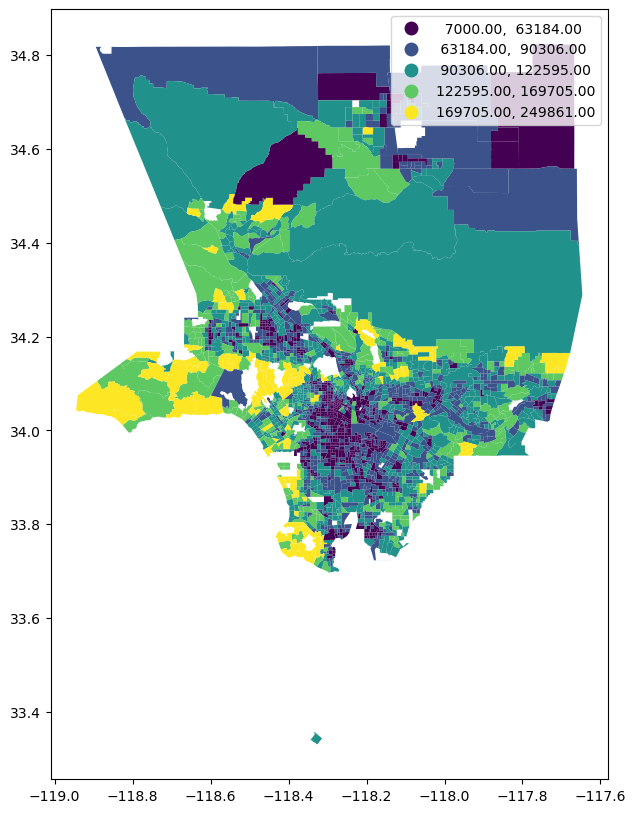

In [34]:
tracts_income.plot(figsize=(12,10),
                 column='MedHHIncome_All',
                 legend=True, 
                 scheme='naturalbreaks')

<Axes: >

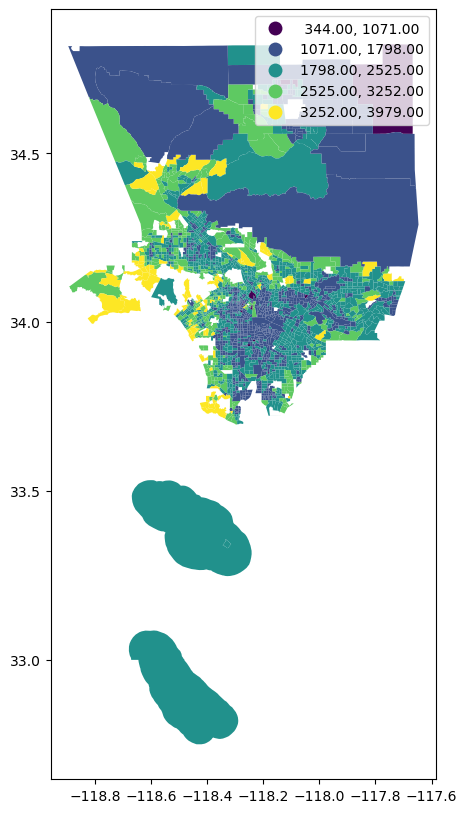

In [35]:
tracts_income.plot(figsize=(12,10),
                 column='MonthlyCosts_All',
                 legend=True, 
                 scheme='equal_interval')

### I am interested in plotting monthly housing costs as a percentage of monthly income

In [36]:
#Adding new column: # Avoid division by zero (replace zero or NaN incomes with NaN)
tracts_income["HousingCostPercentage"] = (
    (tracts_income["MonthlyCosts_All"] / (tracts_income["MedHHIncome_All"] / 12)) * 100
)


<Axes: >

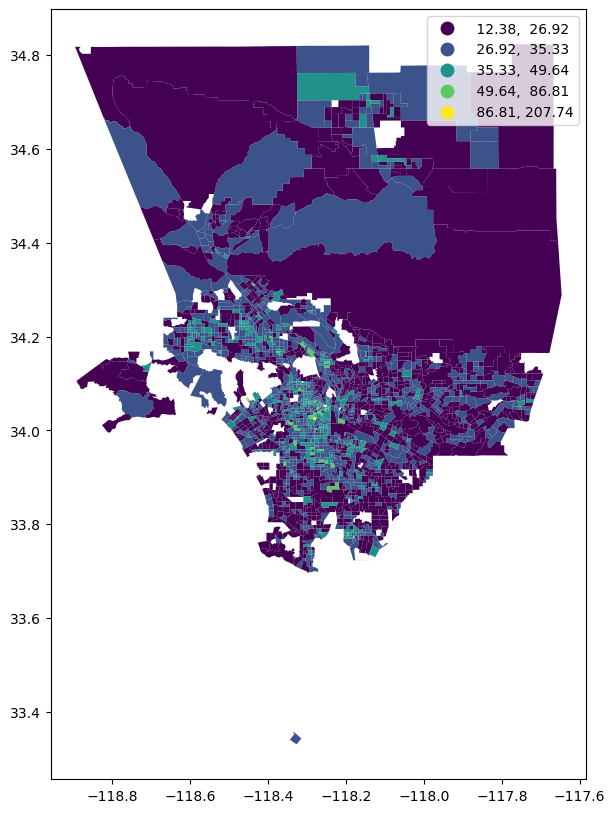

In [37]:
tracts_income.plot(figsize=(12,10),
                 column='HousingCostPercentage',
                 legend=True, 
                 scheme='naturalbreaks')

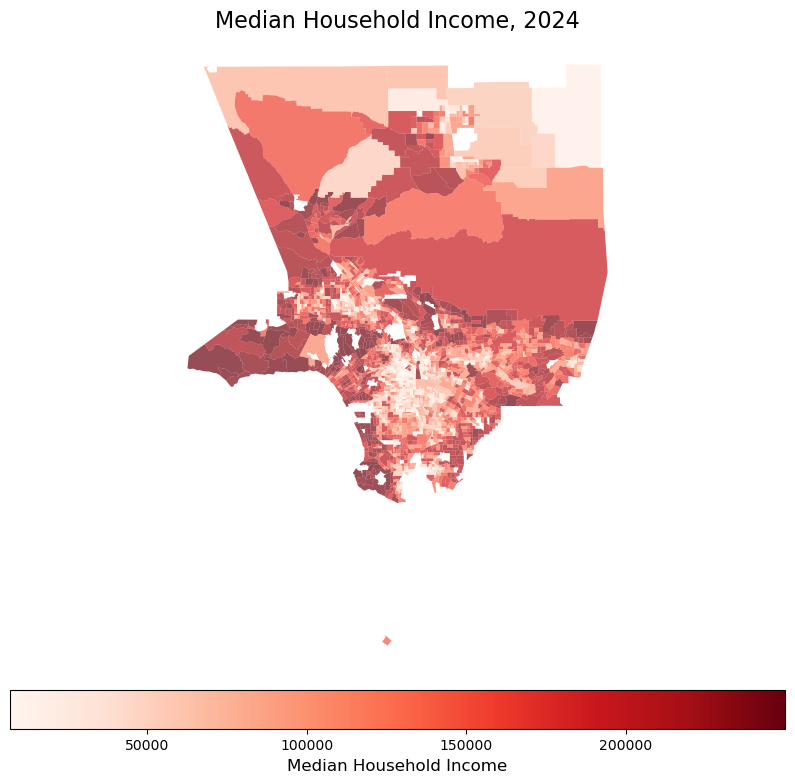

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/221-final-project/Group Assignments/Income/221-final-project/Group Assignments/Income/medHHincomeLAplot.jpg'

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Assuming 'tracts_income' is already your GeoDataFrame

# Create the figure and axis with adjusted size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, using the 'MedHHIncome_All' column to set the color
# Use 'Reds' or any other color map you prefer
gdf_plot = tracts_income.plot(
    ax=ax,
    column='MedHHIncome_All',  # Column to be used for coloring
    cmap='Reds',  # Color map for gradient
    legend=False,  # Disable default legend
    alpha=0.7  # Make the polygons slightly transparent for better visibility
)

# Add a colorbar (this acts as the gradient bar)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=tracts_income['MedHHIncome_All'].min(), vmax=tracts_income['MedHHIncome_All'].max()))
sm.set_array([])  # We don't need any data associated with the colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Median Household Income', fontsize=12)

# Title and styling
ax.set_title('Median Household Income, 2024', fontsize=16)
ax.axis('off')  # Remove axis for better visualization

# Save the plot to a file with adjusted DPI and size
plt.savefig('MedHHIncome.jpg', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()

plt.savefig('221-final-project/Group Assignments/Income/medHHincomeLAplot.jpg', dpi=150)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, using the 'MedHHIncome_All' column to set the color
# Use 'Reds' or any other color map you prefer
gdf_plot = tracts_income.plot(
    ax=ax,
    column='MonthlyCosts_All',  # Column to be used for coloring
    cmap='Reds',  # Color map for gradient
    legend=False,  # Disable default legend
    alpha=0.7  # Make the polygons slightly transparent for better visibility
)

# Add a colorbar (this acts as the gradient bar)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=tracts_income['MonthlyCosts_All'].min(), vmax=tracts_income['MonthlyCosts_All'].max()))
sm.set_array([])  # We don't need any data associated with the colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Monthly Household Costs', fontsize=12)

# Title and styling
ax.set_title('Median Monthly Housing Costs, 2024', fontsize=16)
ax.axis('off')  # Remove axis for better visualization

# Save the plot to a file with adjusted DPI and size
plt.savefig('MedHHCosts.jpg', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, using the 'MedHHIncome_All' column to set the color
# Use 'Reds' or any other color map you prefer
gdf_plot = tracts_income.plot(
    ax=ax,
    column='HousingCostPercentage',  # Column to be used for coloring
    cmap='Reds',  # Color map for gradient
    legend=False,  # Disable default legend
    alpha=0.7  # Make the polygons slightly transparent for better visibility
)

# Add a colorbar (this acts as the gradient bar)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=tracts_income['HousingCostPercentage'].min(), vmax=tracts_income['HousingCostPercentage'].max()))
sm.set_array([])  # We don't need any data associated with the colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Monthly Housing Costs as a Percentage of Income', fontsize=12)

# Title and styling
ax.set_title('Median Monthly Housing Costs as a Percentage of Income, 2024', fontsize=16)
ax.axis('off')  # Remove axis for better visualization

# Save the plot to a file with adjusted DPI and size
plt.savefig('MedHHCostsIncome.jpg', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
df2.sample()

In [ ]:
print(tracts_income.columns)

In [ ]:
tracts_income.sample(1)

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import os  # To check and create directories if needed

# Define bounding boxes for Downtown LA and South Central LA
downtown_bounds = [-118.2673, 34.027, -118.2257, 34.076]  # [min_long, min_lat, max_long, max_lat]
south_central_bounds = [-118.28, 33.9, -118.18, 34.03]  # [min_long, min_lat, max_long, max_lat]

# Function to filter GeoDataFrame based on bounding box
def filter_by_bounding_box(gdf, bounds):
    min_long, min_lat, max_long, max_lat = bounds
    return gdf.cx[min_long:max_long, min_lat:max_lat]

# Plotting function
def plot_static_map(gdf, title, filename, cmap='Reds', bounds=None):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Apply bounding box if provided
    if bounds:
        gdf = filter_by_bounding_box(gdf, bounds)

    # Plot the data, using the 'HousingCostPercentage' column to set the color
    gdf.plot(
        ax=ax,
        column='HousingCostPercentage',  # Column to be used for coloring
        cmap=cmap,  # Color map for gradient
        legend=False,  # Disable default legend
        alpha=0.7  # Make the polygons slightly transparent for better visibility
    )

    # Add a colorbar (this acts as the gradient bar)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf['HousingCostPercentage'].min(), vmax=gdf['HousingCostPercentage'].max()))
    sm.set_array([])  # We don't need any data associated with the colorbar
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
    cbar.set_label('Monthly Housing Costs as a Percentage of Income', fontsize=12)

    # Title and styling
    ax.set_title(title, fontsize=16)
    ax.axis('off')  # Remove axis for better visualization

    # Ensure the output directory exists
    output_dir = os.path.dirname(filename)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the plot to a file with adjusted DPI and size
    plt.savefig(filename, dpi=150, bbox_inches='tight')

    # Show the plot
    plt.show()


# File paths for saving
downtown_filename = '/home/jovyan/work/output/downtown_housing_costs.jpg'
south_central_filename = '/home/jovyan/work/output/south_central_housing_costs.jpg'

# Plot Downtown LA (using bounding box for zooming)
plot_static_map(tracts_income, "Housing Costs as a Percentage of Income - Downtown LA, 2024", downtown_filename, bounds=downtown_bounds)

# Plot South Central LA (using bounding box for zooming)
plot_static_map(tracts_income, "Housing Costs as a Percentage of Income - South Central LA, 2024", south_central_filename, bounds=south_central_bounds)


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import os  # To check and create directories if needed

# Define bounding boxes for Downtown LA and South Central LA
downtown_bounds = [-118.2673, 34.027, -118.2257, 34.076]  # [min_long, min_lat, max_long, max_lat]
south_central_bounds = [-118.28, 33.9, -118.18, 34.03]  # [min_long, min_lat, max_long, max_lat]

# Function to filter GeoDataFrame based on bounding box
def filter_by_bounding_box(gdf, bounds):
    min_long, min_lat, max_long, max_lat = bounds
    return gdf.cx[min_long:max_long, min_lat:max_lat]

# Plotting function
def plot_static_map(gdf, title, filename, cmap='Reds', bounds=None):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Apply bounding box if provided
    if bounds:
        gdf = filter_by_bounding_box(gdf, bounds)

    # Plot the data, using the 'MedHHIncome_All' column to set the color
    gdf.plot(
        ax=ax,
        column='MedHHIncome_All',  # Column to be used for coloring
        cmap=cmap,  # Color map for gradient
        legend=False,  # Disable default legend
        alpha=0.7  # Make the polygons slightly transparent for better visibility
    )

    # Add a colorbar (this acts as the gradient bar)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf['MedHHIncome_All'].min(), vmax=gdf['MedHHIncome_All'].max()))
    sm.set_array([])  # We don't need any data associated with the colorbar
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
    cbar.set_label('Median Household Income', fontsize=12)

    # Title and styling
    ax.set_title(title, fontsize=16)
    ax.axis('off')  # Remove axis for better visualization

    # Ensure the output directory exists
    output_dir = os.path.dirname(filename)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the plot to a file with adjusted DPI and size
    plt.savefig(filename, dpi=150, bbox_inches='tight')

    # Show the plot
    plt.show()


# File paths for saving
downtown_filename = '/home/jovyan/work/output/downtown_housing_income.jpg'
south_central_filename = '/home/jovyan/work/output/south_central_housing_income.jpg'

# Plot Downtown LA (using bounding box for zooming)
plot_static_map(tracts_income, "Median Household Income - Downtown LA, 2024", downtown_filename, bounds=downtown_bounds)

# Plot South Central LA (using bounding box for zooming)
plot_static_map(tracts_income, "Median Household Income - South Central LA, 2024", south_central_filename, bounds=south_central_bounds)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate average values for a specific column within a bounding box
def calculate_average_within_bounds(gdf, column, bounds):
    filtered_gdf = filter_by_bounding_box(gdf, bounds)
    return filtered_gdf[column].mean()

# Calculate averages for each region
average_income_downtown = calculate_average_within_bounds(tracts_income, 'MedHHIncome_All', downtown_bounds)
average_income_south_central = calculate_average_within_bounds(tracts_income, 'MedHHIncome_All', south_central_bounds)
average_income_la_county = tracts_income['MedHHIncome_All'].mean()

average_housing_costs_downtown = calculate_average_within_bounds(tracts_income, 'HousingCostPercentage', downtown_bounds)
average_housing_costs_south_central = calculate_average_within_bounds(tracts_income, 'HousingCostPercentage', south_central_bounds)
average_housing_costs_la_county = tracts_income['HousingCostPercentage'].mean()

# Create dataframes for plotting
income_data = pd.DataFrame({
    "Region": ["Downtown LA", "South Central LA", "Los Angeles County"],
    "Average Median Household Income": [
        average_income_downtown,
        average_income_south_central,
        average_income_la_county
    ]
})

housing_costs_data = pd.DataFrame({
    "Region": ["Downtown LA", "South Central LA", "Los Angeles County"],
    "Average Housing Costs as % of Income": [
        average_housing_costs_downtown,
        average_housing_costs_south_central,
        average_housing_costs_la_county
    ]
})

# Plot Average Median Household Income
plt.figure(figsize=(8, 6))
plt.bar(income_data["Region"], income_data["Average Median Household Income"], color=['#FF6347', '#FFA07A', '#FFE4B5'])
plt.title("Average Median Household Income by Region, 2024", fontsize=14)
plt.ylabel("Average Median Household Income ($)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/home/jovyan/work/output/average_income_comparison.jpg', dpi=150)
plt.show()

# Plot Average Housing Costs as % of Income
plt.figure(figsize=(8, 6))
plt.bar(housing_costs_data["Region"], housing_costs_data["Average Housing Costs as % of Income"], color=['#4682B4', '#5F9EA0', '#B0C4DE'])
plt.title("Average Housing Costs as % of Income by Region, 2024", fontsize=14)
plt.ylabel("Average Housing Costs as % of Income (%)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/home/jovyan/work/output/average_housing_costs_comparison.jpg', dpi=150)
plt.show()
